In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json

%matplotlib inline  

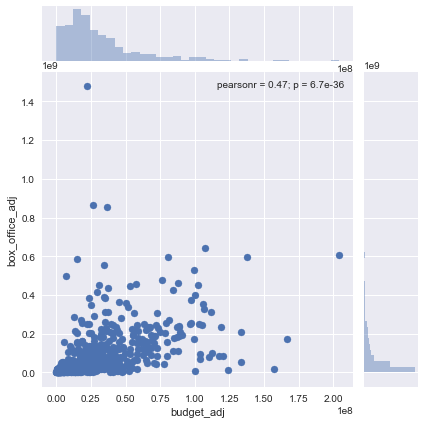

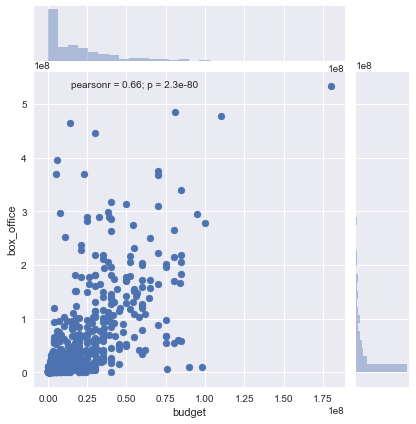

In [70]:
with open("scatter.json", "r") as scatter_file:
    scatter_data = pd.read_json(scatter_file)
    
scatter = sns.jointplot(x="budget_adj", y="box_office_adj", data=scatter_data)
scatter = sns.jointplot(x="budget", y="box_office", data=scatter_data)

In [73]:
scatter_data["decade"] = (scatter_data["year"]//10)*10

decade_min, decade_max = scatter_data["decade"].min(), scatter_data["decade"].max()

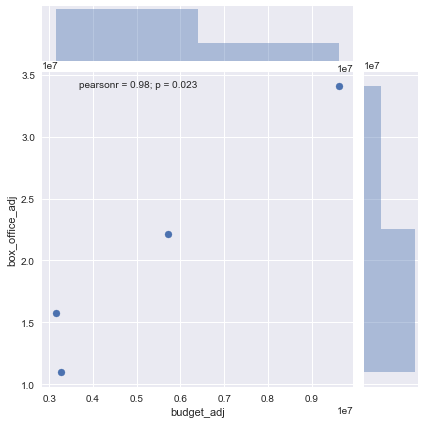

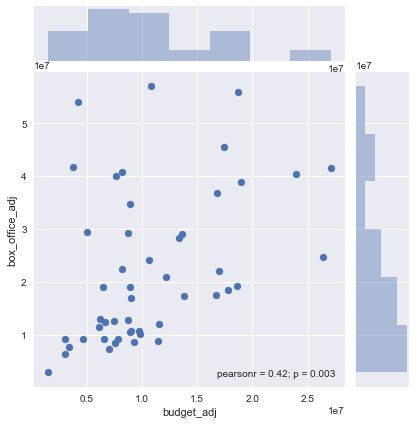

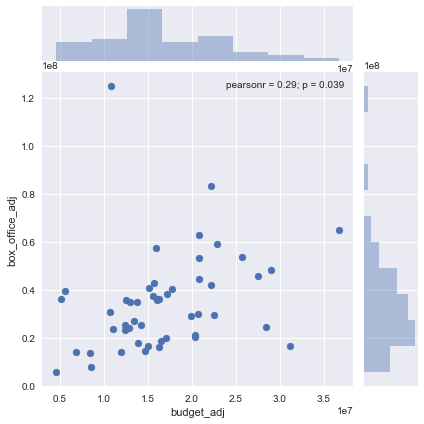

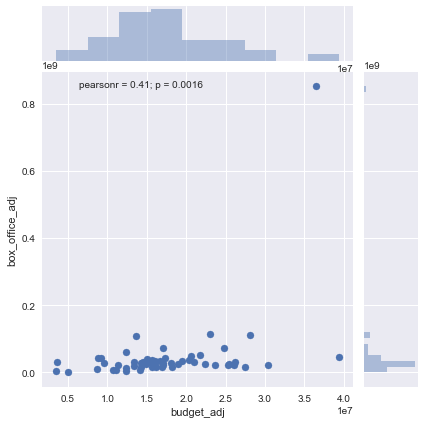

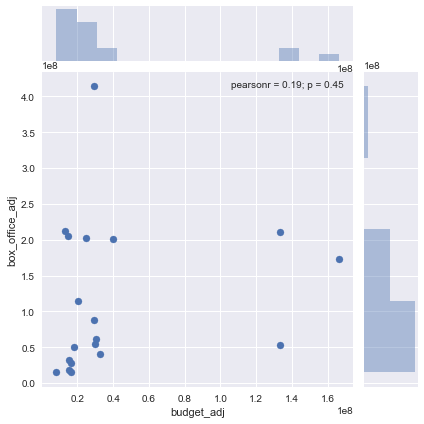

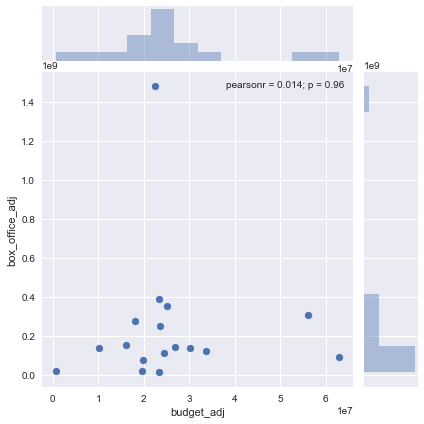

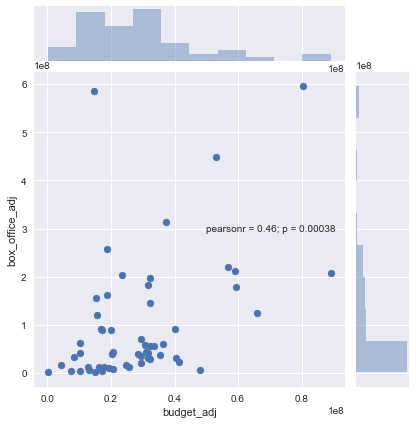

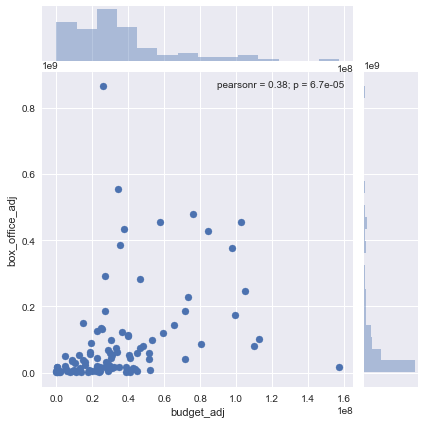

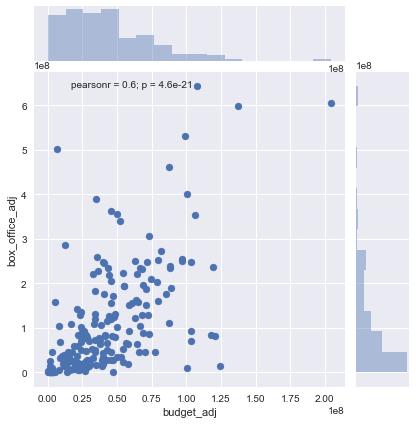

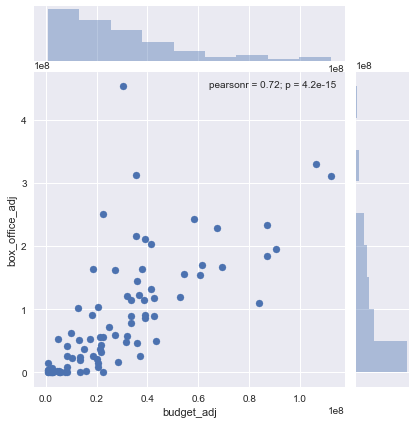

In [43]:
for year in range(decade_min, decade_max+1, 10):
    movies_by_decade = scatter_data[scatter_data["decade"] == year]
    scatter = sns.jointplot(x="budget_adj", y="box_office_adj", data=movies_by_decade)

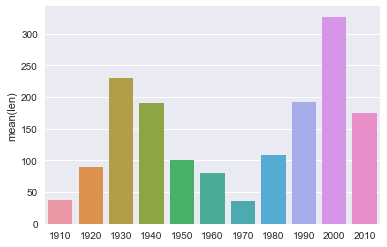

In [59]:
with open("decades.json", "r") as decades_file:
    decades_data = pd.Series(eval(decades_file.read()), name="movies").to_frame()

decades_data["len"] = np.vectorize(len)(decades_data)
decades_plot = sns.barplot(x=decades_data.index, y=decades_data["len"])

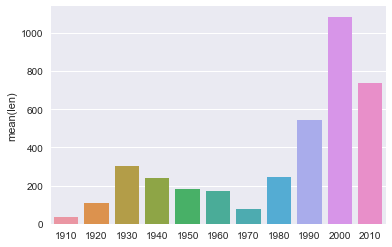

In [60]:
with open("actor-decades.json", "r") as actors_file:
    actors_data = pd.Series(eval(actors_file.read()), name="actors").to_frame()

actors_data["len"] = np.vectorize(len)(actors_data)
actors_plot = sns.barplot(x=actors_data.index, y=actors_data["len"])

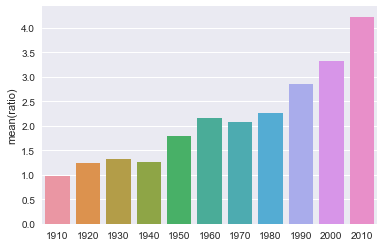

In [62]:
actors_per_movie = actors_data.copy()
actors_per_movie["ratio"] = actors_data["len"]/decades_data["len"]

ratio_plot = sns.barplot(x=actors_per_movie.index, y=actors_per_movie["ratio"])